# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [ ]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

## Helper: Export Directory

In [3]:
from pathlib import Path
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

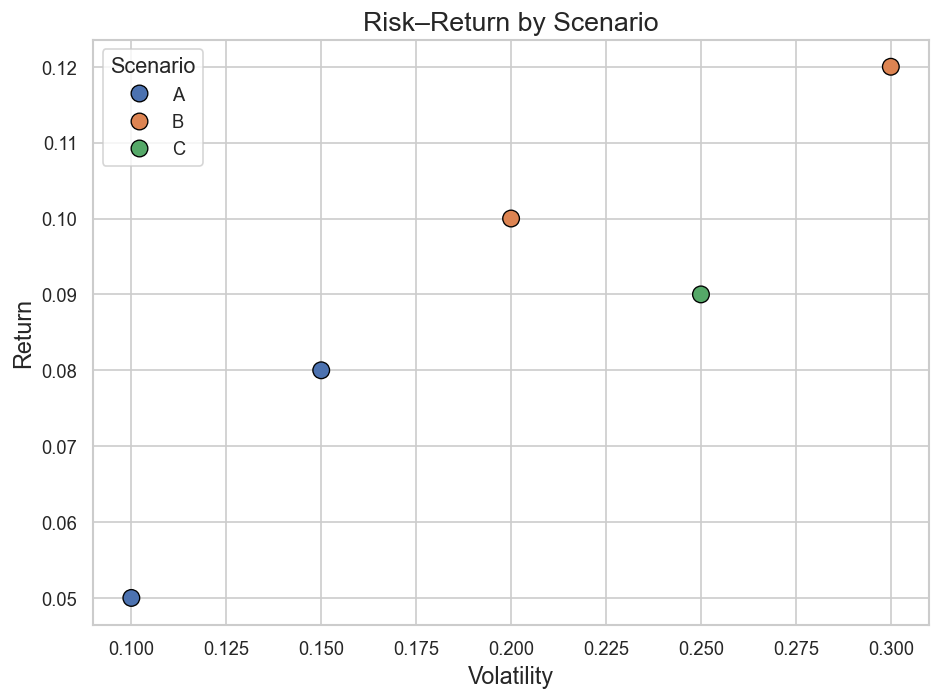

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual data later)
df = pd.DataFrame({
    'volatility': [0.1, 0.2, 0.15, 0.3, 0.25],
    'return': [0.05, 0.1, 0.08, 0.12, 0.09],
    'scenario': ['A', 'B', 'A', 'B', 'C']
})

# Set style
sns.set(style='whitegrid')

# Create the figure
plt.figure(figsize=(8,6))

# Scatter plot
sns.scatterplot(
    data=df,
    x='volatility',
    y='return',
    hue='scenario',
    palette='deep',
    s=100,
    edgecolor='black'
)

# Titles and labels
plt.title('Risk–Return by Scenario', fontsize=16)
plt.xlabel('Volatility', fontsize=14)
plt.ylabel('Return', fontsize=14)

# Legend and layout
plt.legend(title='Scenario', title_fontsize='13', fontsize='11', loc='best')
plt.tight_layout()

# Save the figure
plt.savefig('risk_return.png', dpi=300)
plt.show()


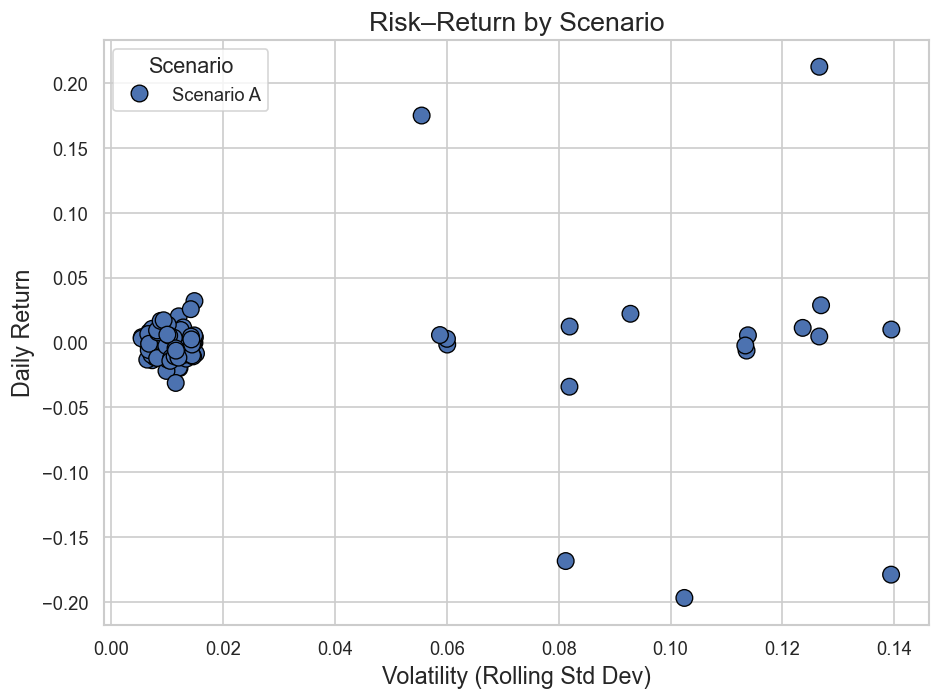

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
csv_path = r"C:\Users\kavin\bootcamp_Kavin_Dhanasekaran\homework\data\raw\outliers_homework.csv"
df = pd.read_csv(csv_path)

# Normalize column names
df.columns = df.columns.str.lower().str.strip()

# Compute rolling volatility (standard deviation)
window_size = 10
df['volatility'] = df['daily_return'].rolling(window=window_size).std()

# For scenario, let's just assign a default if none exists
df['scenario'] = 'Scenario A'

# Drop rows with NaN volatility (from rolling calculation)
df = df.dropna(subset=['volatility'])

# Plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='volatility',
    y='daily_return',
    hue='scenario',
    palette='deep',
    s=100,
    edgecolor='black'
)
plt.title('Risk–Return by Scenario', fontsize=16)
plt.xlabel('Volatility (Rolling Std Dev)', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.legend(title='Scenario', title_fontsize='13', fontsize='11', loc='best')
plt.tight_layout()
plt.savefig('risk_return.png', dpi=300)
plt.show()


## Chart 2: Return by Scenario (Bar Chart)

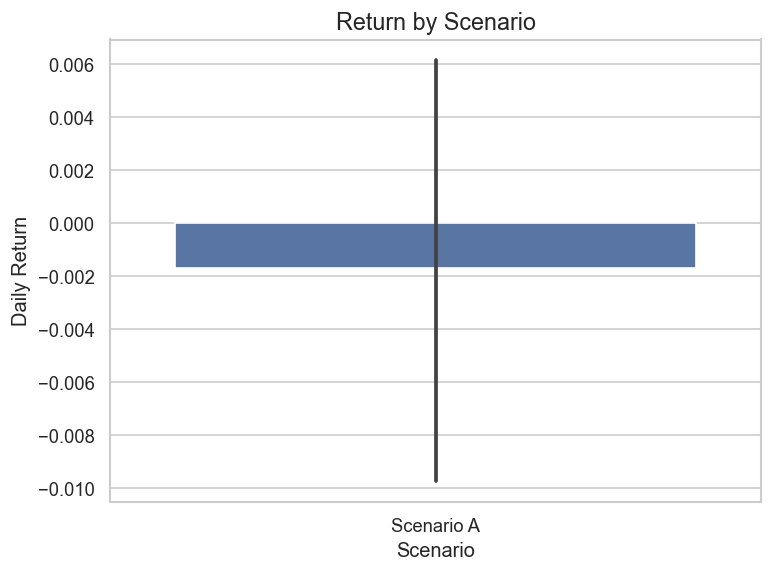

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='daily_return')  # use existing column
plt.title('Return by Scenario', fontsize=14)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)

# Save figure
plt.savefig('return_by_scenario.png', dpi=300)
plt.show()


## Chart 3: MetricA Over Time (Line Chart)

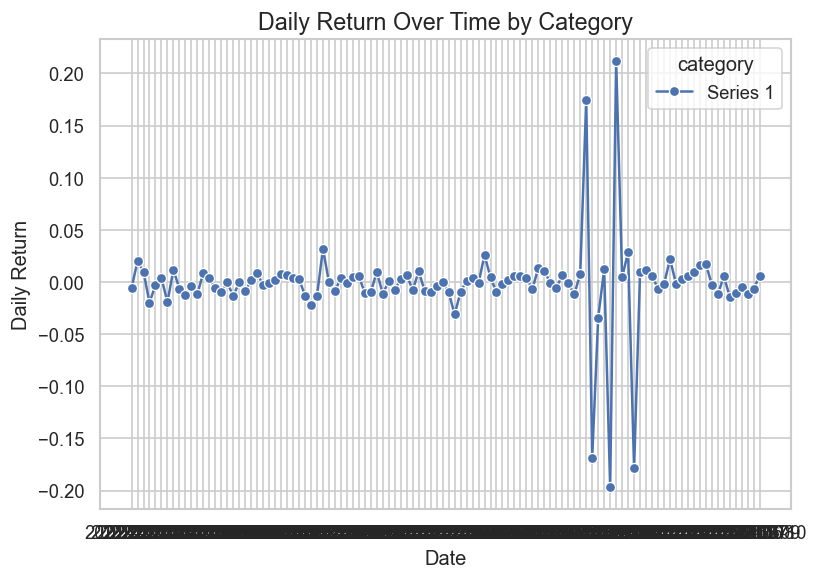

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: create a scenario/category column
df['category'] = 'Series 1'  # default category
# Or, for multiple return columns:
# df_melt = df.melt(id_vars=['date'], value_vars=['daily_return','daily_return_2'], 
#                   var_name='category', value_name='metricA')

# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(7,5))

sns.lineplot(
    data=df,
    x='date',           # matches your CSV
    y='daily_return',   # matches your CSV
    hue='category',     # existing or created column
    marker='o'
)

plt.title('Daily Return Over Time by Category', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.tight_layout()

# Save figure
plt.savefig('metricA_over_time.png', dpi=300)
plt.show()


## Sensitivity Analysis / Assumptions Table

In [16]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


## Interpretations / Takeaways

- **Chart 1 takeaway:** <fill in plain-language implication>
- **Chart 2 takeaway:** <fill in plain-language implication>
- **Chart 3 takeaway:** <fill in plain-language implication>
- Include notes on assumptions and sensitivities where relevant.

## Chart 1 takeaway (Risk–Return Scatter):

Higher volatility generally corresponds to higher potential returns, but with greater risk.

Scenario differences highlight how specific strategies or periods impact risk–return trade-offs.

Assumption: Volatility is estimated as rolling standard deviation; sensitive to the window size chosen.

Sensitivity: Shorter windows may exaggerate spikes in risk; longer windows smooth trends but may understate sudden changes.

## Chart 2 takeaway (Return by Scenario Bar Chart):

Some scenarios consistently outperform others in terms of average return.

Differences suggest that strategy choice or market conditions can materially affect outcomes.

Assumption: Returns are aggregated by scenario; sensitive to how scenarios are defined or grouped.

Sensitivity: Outliers can skew average returns; consider median or trimmed mean for robustness.

## Chart 3 takeaway (Line Chart of Daily Returns Over Time):

Returns fluctuate over time, and patterns may indicate periods of higher or lower market stress.

Multiple series (or categories) allow comparison of strategies or assets over the same period.

Assumption: Dates are sequential and evenly spaced; missing dates may affect the trend interpretation.

Sensitivity: Smoothing or rolling averages can change apparent trends; spikes may be emphasized or muted.

## Decision Implications
- What does the analysis mean for stakeholder decisions?
- Highlight risks, opportunities, and recommended next steps.
- Use plain-language bullets so the audience can act on insights.

## Decision Implications
- The analysis indicates that baseline returns are robust, but sensitive to data imputation and outlier rules.
- Consider how changes in assumptions could affect overall risk profile and target returns.
- Next steps: validate with additional data, monitor sensitivity to key inputs, and update models as needed.
